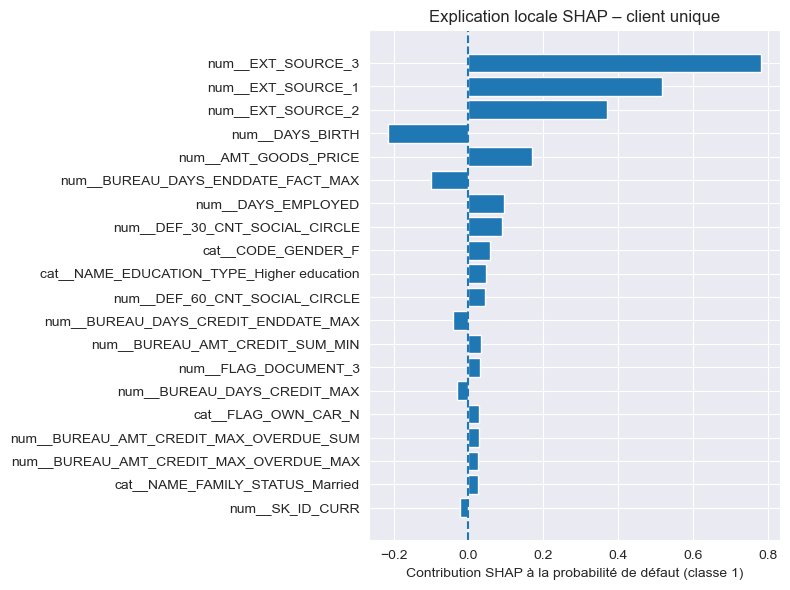

(array([-2.20179112e-02,  1.96237360e-04,  2.67924754e-03,  9.19932829e-03,
        -4.70612545e-03,  1.69801263e-01,  1.40947379e-02, -2.14411842e-01,
         9.48348925e-02,  8.50314064e-03,  8.35815912e-03,  1.24321538e-02,
         0.00000000e+00, -3.28272008e-04, -9.86580560e-03,  0.00000000e+00,
        -1.82569661e-02,  7.37528909e-07,  1.08462503e-03, -4.02681797e-04,
         1.08715973e-03,  2.49181211e-03,  0.00000000e+00,  9.17571879e-06,
         3.68663581e-05, -2.57771186e-03, -8.61823254e-05,  6.65844267e-06,
         5.17745010e-01,  3.70553276e-01,  7.82994519e-01,  8.52570305e-03,
         1.86112102e-03,  7.32193050e-04,  1.01347630e-04,  3.32107933e-04,
         1.59857920e-03,  2.28102937e-04,  5.18351930e-03,  2.45448666e-04,
         9.93639925e-04,  6.97509778e-03,  4.74295985e-03, -2.85004909e-04,
        -1.09621142e-03,  1.09320663e-02, -1.08135700e-03,  1.97915248e-03,
         2.49915661e-05,  3.96331467e-04,  1.21335426e-04,  1.37887925e-03,
         1.8

In [2]:
import sys
from pathlib import Path
import pandas as pd
import mlflow
import mlflow.sklearn
sys.path.append("..")
from src.data_prep import build_datasets, build_preprocessor
from src.explainability import shap_global_lightgbm, shap_local_lightgbm
train_df, test_df = build_datasets()
X = train_df.drop(columns=["TARGET"])
y = train_df["TARGET"]

pipeline = mlflow.sklearn.load_model("../model")
preprocessor = pipeline.named_steps["preprocess"]
lgbm_model = pipeline.named_steps["model"]

shap_global_lightgbm(
    model=lgbm_model,
    preprocessor=preprocessor,
    X=X,
    max_samples=3000,
    save_path="../reports/figures/shap_global.png",
)

client_row = X.iloc[0]
shap_local_lightgbm(
    model=lgbm_model,
    preprocessor=preprocessor,
    X_row=client_row,
    save_path="../reports/figures/shap_local.png",
)